In [9]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('flirting_rated.csv', index_col=None)
dataset=df 
dataset

,polarity,final_messages
0,0.0,Why do u say that Kat
1,0.0,Hey Lizzie what’s ur most played song on Spoti...
2,0.0,Haha drivers license for me too but most recen...
3,0.0,Frank is always on repeat tho
4,0.0,Aw thank youuu I see u like Frank too what is ...
...,...,...
2881,0.0,"i don't watch reality tv, no clue"
2882,0.0,what kind of air guitars?
2883,0.0,i have an epiphone
2884,0.0,but favourite?


In [11]:
          
y=dataset["polarity"]
X_train, X_test, y_train, y_test = train_test_split(dataset['final_messages'], y, test_size=0.33, random_state=53)
Tfidf_Vectorizer =TfidfVectorizer(stop_words='english')
Tfidf_train = Tfidf_Vectorizer.fit_transform(X_train)
print(Tfidf_train)
Tfidf_test =Tfidf_Vectorizer.transform(X_test)
len(Tfidf_Vectorizer.get_feature_names_out())
print(Tfidf_train.toarray())

  (0, 532)	0.5767100462634752
  (0, 2061)	0.6526573120688661
  (0, 2423)	0.49136946948485
  (1, 1056)	0.2897007784357219
  (1, 2627)	0.46098814236586017
  (1, 719)	0.5018386950048829
  (1, 1410)	0.4675827358949034
  (1, 1250)	0.48279157082600704
  (4, 525)	0.42456857336747206
  (4, 153)	0.4082149614831326
  (4, 1287)	0.2571886185721325
  (4, 2617)	0.32596321992217736
  (4, 1368)	0.4082149614831326
  (4, 1691)	0.44761769476086055
  (4, 680)	0.2602621307475114
  (4, 1386)	0.21439830531518045
  (5, 2057)	0.8467242277310512
  (5, 1386)	0.5320320311534401
  (6, 1223)	0.5599345127464396
  (6, 62)	0.5383668502379466
  (6, 924)	0.477571024233792
  (6, 852)	0.4105610707465658
  (7, 857)	1.0
  (8, 188)	0.5827223024111483
  (8, 1065)	0.6046180778907166
  :	:
  (1926, 1413)	0.5593981578285324
  (1926, 2336)	0.4738171386295552
  (1926, 1386)	0.2938011301671187
  (1927, 978)	0.7709806485364679
  (1927, 1774)	0.6368585710990214
  (1928, 853)	0.7277168382304225
  (1928, 1003)	0.4840539043900561
  (192

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

def evaluate_classifier(classifier, X_test, y_test):
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, cm

def logistic_regression(X_train, y_train, X_test, y_test):
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def linear_svm(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def kernel_svm(X_train, y_train, X_test, y_test):
    classifier = SVC(kernel='rbf', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def naive_bayes(X_train, y_train, X_test, y_test):
    classifier = GaussianNB()
    classifier.fit(X_train.toarray(), y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test.toarray(), y_test)
    return classifier, accuracy, report, cm

def k_nearest_neighbors(X_train, y_train, X_test, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def decision_tree(X_train, y_train, X_test, y_test):
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

def random_forest(X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    accuracy, report, cm = evaluate_classifier(classifier, X_test, y_test)
    return classifier, accuracy, report, cm

# Sample usage
X_train, X_test, y_train, y_test = train_test_split(dataset['final_messages'], y, test_size=0.33, random_state=53)

# Clean y_train and y_test
y_train = pd.Series(y_train).replace([np.inf, -np.inf], np.nan).dropna()
y_test = pd.Series(y_test).replace([np.inf, -np.inf], np.nan).dropna()

# Align X_train and X_test with the cleaned y_train and y_test
X_train = X_train[y_train.index]
X_test = X_test[y_test.index]

# Apply TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Call each algorithm function with the training and test data
models = {
    'Logistic Regression': logistic_regression(tfidf_train, y_train, tfidf_test, y_test),
    'Linear SVM': linear_svm(tfidf_train, y_train, tfidf_test, y_test),
    'Kernel SVM': kernel_svm(tfidf_train, y_train, tfidf_test, y_test),
    'Naive Bayes': naive_bayes(tfidf_train, y_train, tfidf_test, y_test),
    'K-Nearest Neighbors': k_nearest_neighbors(tfidf_train, y_train, tfidf_test, y_test),
    'Decision Tree': decision_tree(tfidf_train, y_train, tfidf_test, y_test),
    'Random Forest': random_forest(tfidf_train, y_train, tfidf_test, y_test)
}

# Print results
for clf_name, (classifier, accuracy, report, cm) in models.items():
    print(clf_name)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)
    print("---------------------------------------")


Logistic Regression
Accuracy: 0.8644957983193278
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       789
         1.0       0.95      0.22      0.36       163

    accuracy                           0.86       952
   macro avg       0.90      0.61      0.64       952
weighted avg       0.88      0.86      0.83       952

Confusion Matrix:
[[787   2]
 [127  36]]
---------------------------------------
Linear SVM
Accuracy: 0.8834033613445378
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       789
         1.0       0.91      0.36      0.51       163

    accuracy                           0.88       952
   macro avg       0.89      0.67      0.72       952
weighted avg       0.89      0.88      0.86       952

Confusion Matrix:
[[783   6]
 [105  58]]
---------------------------------------
Kernel SVM
Accuracy: 0.8781512605042017
Classific

In [15]:
import pandas as pd

# Initialize empty lists to store classifier names and accuracies
classifier_names = []
accuracies = []

# Iterate over each classifier and store the accuracy
for clf_name, (classifier, accuracy, _, _) in models.items():
    classifier_names.append(clf_name)
    accuracies.append(accuracy)

# Create a DataFrame to store the accuracy scores
accuracy_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracies
})

# Display the DataFrame
print(accuracy_df)


            Classifier  Accuracy
0  Logistic Regression  0.864496
1           Linear SVM  0.883403
2           Kernel SVM  0.878151
3          Naive Bayes  0.627101
4  K-Nearest Neighbors  0.823529
5        Decision Tree  0.831933
6        Random Forest  0.866597


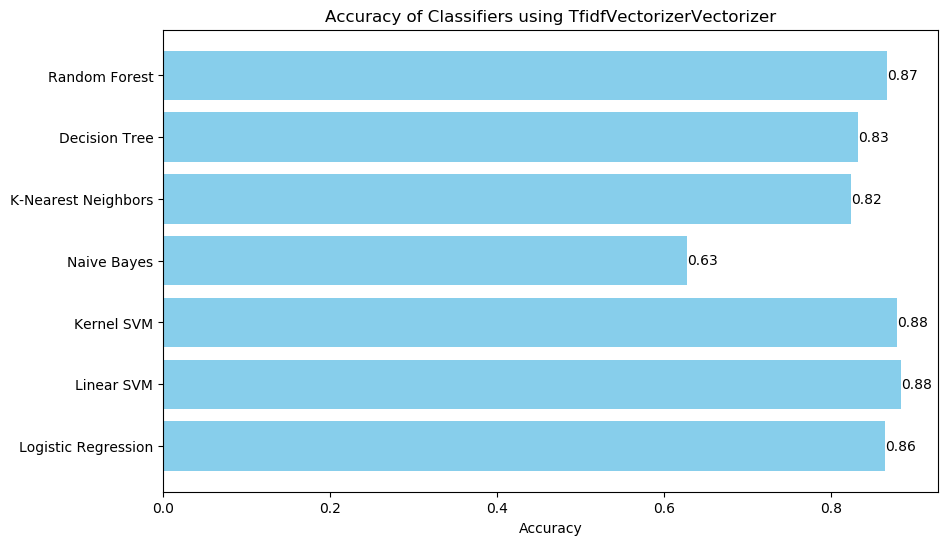

In [16]:
import matplotlib.pyplot as plt

# Initialize lists to store classifier names and accuracy scores
classifiers = []
accuracies = []

# Iterate over each classifier and store the accuracy scores
for clf_name, (_, accuracy, _, _) in models.items():
    classifiers.append(clf_name)
    accuracies.append(accuracy)

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Classifiers using TfidfVectorizerVectorizer')

# Add accuracy scores to the end of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{acc:.2f}', 
             va='center', ha='left')

